# MNIST Digit Classifier

### 1. Performing ETL on the datasets

In [ ]:
import os
import gzip
import shutil

os.makedirs("dataset", exist_ok=False)

path = "data/"

files = os.listdir(path)
for file in files:
    if file.endswith("gz"):
        print("Extracting ", file)
        #Extracting the dataset
        with gzip.open(path + file, "rb") as gzfile:
            with open("dataset/" + file.split(".")[0], "wb") as ubytefile:
                shutil.copyfileobj(f_in, f_out)

print("Extraction Complete")

Extracting  t10k-images-idx3-ubyte.gz
Extracting  train-labels-idx1-ubyte.gz
Extracting  train-images-idx3-ubyte.gz
Extracting  t10k-labels-idx1-ubyte.gz
Extraction Complete


In [4]:


#Drive path used as a colab notebook, redundent.
#drive_path = "drive/MyDrive/Colab_Notebooks/"

In [5]:
#!pip install idx2numpy
import os
import numpy as np
import idx2numpy as idx

#data = drive_path + "dataset/"
data = "dataset/" #Device path
files = os.listdir(data)
print(files)
#Extracting training and test data
y_train= idx.convert_from_file(data + 'train-labels-idx1-ubyte')
y_test= idx.convert_from_file(data + 't10k-labels-idx1-ubyte')
X_train = idx.convert_from_file(data + 'train-images-idx3-ubyte')
X_test = idx.convert_from_file(data + 't10k-images-idx3-ubyte')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
['t10k-images-idx3-ubyte', 'train-labels-idx1-ubyte', 't10k-labels-idx1-ubyte', 'train-images-idx3-ubyte']


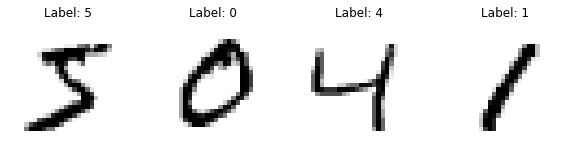

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

#Display first 4 images in dataset
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, X_train[:4], y_train[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.binary, interpolation="nearest")
    ax.set_title(f"Label: {label}")

In [3]:
#used to mount google drive to 

#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
X_train = np.reshape(X_train, (len(X_train), -1))
X_test = np.reshape(X_test, (len(X_test), -1))

print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [8]:
#Import Libraries

from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

In [9]:

scaler = MinMaxScaler() #The scale ranges from 0 to 1
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [10]:
#Tuning Hyper parameters to find the best regularization strength
model = SVC()
parameters = {
        'kernel' : ['rbf'], 'C' : [100,10,1,0.1], 'gamma' : ['scale']
    }

svm = GridSearchCV(estimator = model, param_grid = parameters,
 scoring = 'accuracy', refit = 'accuracy', cv = 5)

svm.fit(X_train, y_train)

#Note: Using polynomial models with degree range upto 9 seemed like a good candidate for tuning
#yet not viable as the model training time we sharply higher, and PCA didnt show any
#remarkable results. It would also require deskewing of the images which was not possible.

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [100, 10, 1, 0.1], 'gamma': ['scale'],
                         'kernel': ['rbf']},
             refit='accuracy', scoring='accuracy')

In [13]:
#best score achieved after hyper parameter tuning
svm.best_score_

0.9819166666666665

In [12]:
#best parameters
svm.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

In [15]:
#!pip install pickle-mixin
#import pickle


#Used to download gogole colab model

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pickle-mixin: filename=pickle_mixin-1.0.2-py3-none-any.whl size=6008 sha256=dbc606de57586bd455817b06f50de5f8460032d3ceabdb7977c85999c3a98753
  Stored in directory: /root/.cache/pip/wheels/d0/70/0b/673e09a7ed429660d22352a1b117b4f616a8fc054bdd7eb157
Successfully built pickle-mixin


In [16]:
#Train the model using best possible parameters
mnist_classifier = SVC(**svm.best_params_)

mnist_classifier.fit(X_train, y_train)

(10000,)
(10000,)
accuracy = 0.9838


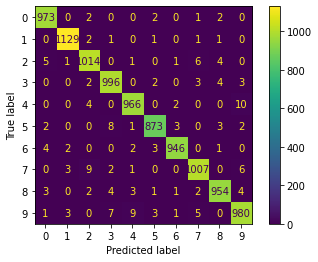

In [19]:
#Testing the model accuracy
y_pred = mnist_classifier.predict(X_test)

print(y_pred.shape)
print(y_test.shape)
print(f'''\
accuracy = {accuracy_score(y_test, y_pred)}\
''')

cmd2 = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred), display_labels= np.arange(0,10))
cmd2.plot()

In [20]:
#Code used on google colab to save model in a pickle file.

#pickle.dump(mnist_classifier, open(data + 'model.pkl', 'wb'))